In [14]:
import pandas as pd

In [15]:
df = pd.read_csv("../data/average-monthly-surface-temperature.csv")

In [16]:
pais = ["Puerto Rico"]
df_filtrado = df[df["Entity"].isin(pais)]

In [17]:
# Verificando se está pegando o pais de escolha
print(df_filtrado.head())

             Entity Code  year         Day  Average surface temperature daily  \
145860  Puerto Rico  PRI  1940  1940-01-15                          23.097775   
145861  Puerto Rico  PRI  1940  1940-02-15                          23.083357   
145862  Puerto Rico  PRI  1940  1940-03-15                          23.126715   
145863  Puerto Rico  PRI  1940  1940-04-15                          24.353450   
145864  Puerto Rico  PRI  1940  1940-05-15                          24.394053   

        Average surface temperature monthly  
145860                            24.265465  
145861                            24.265465  
145862                            24.265465  
145863                            24.265465  
145864                            24.265465  


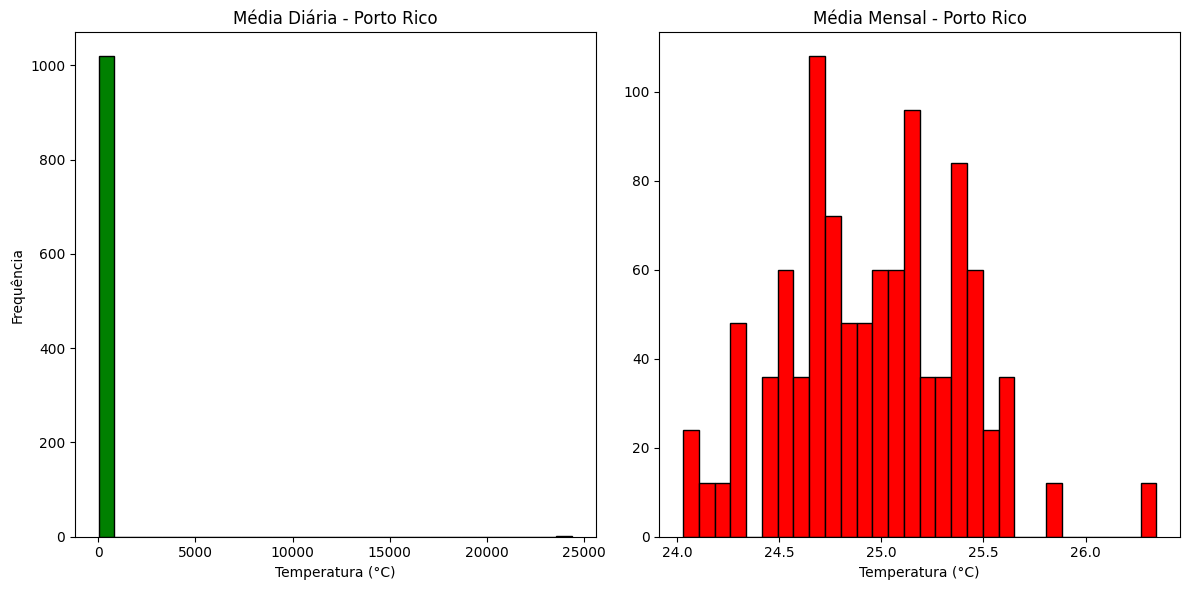

In [18]:
# Importar método de gerar histograma
from Funcoes import gerar_histogramas

# Gerar histograma do pais selecionado "Contém outliers"
gerar_histogramas("Porto Rico", df_filtrado)

In [19]:
# Importar método de identificar outliers
from Funcoes import identificar_outliers

# Função para identificar outliers
outliers_diario = identificar_outliers(df_filtrado['Average surface temperature daily'], 1.5)
outliers_mensal = identificar_outliers(df_filtrado['Average surface temperature monthly'], 1.5)

# Printando os outliers
print(f"Outliers diários:\n {outliers_diario}")
print(f"\nOutliers mensais:\n {outliers_mensal}")

Outliers diários:
 146615    24361.0
Name: Average surface temperature daily, dtype: float64

Outliers mensais:
 Series([], Name: Average surface temperature monthly, dtype: float64)


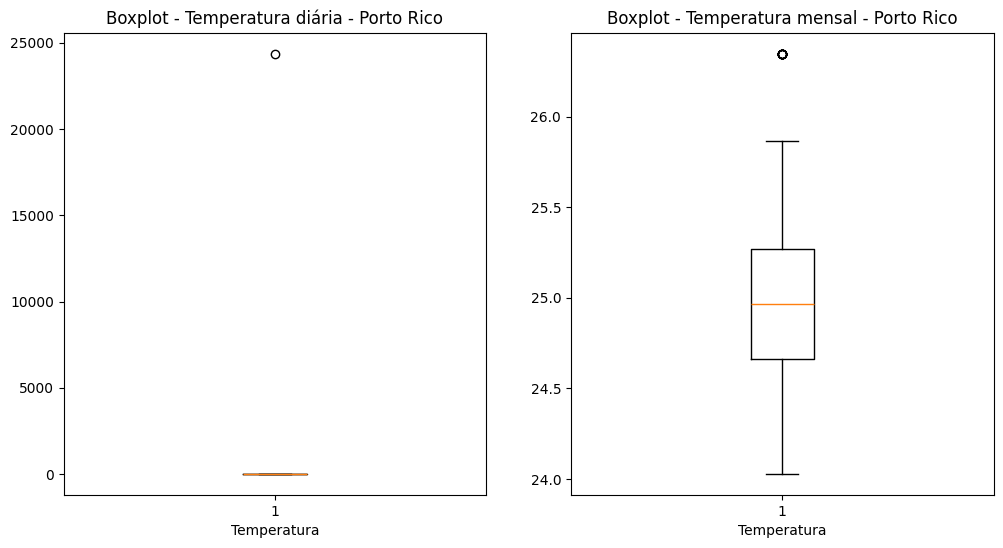

In [20]:
# Importar método de gerar boxplot "Contém outliers"
from Funcoes import gerar_boxplot

gerar_boxplot("Porto Rico", df_filtrado)

In [21]:
# Identificando outliers limite superior
from Funcoes import identificar_outliers_limite_superior

outliers_diario_superior = identificar_outliers_limite_superior(df_filtrado['Average surface temperature daily'])
outliers_mensal_superior = identificar_outliers_limite_superior(df_filtrado['Average surface temperature monthly'])
print(outliers_diario_superior)
print(outliers_mensal_superior)

146615    24361.0
Name: Average surface temperature daily, dtype: float64
Series([], Name: Average surface temperature monthly, dtype: float64)


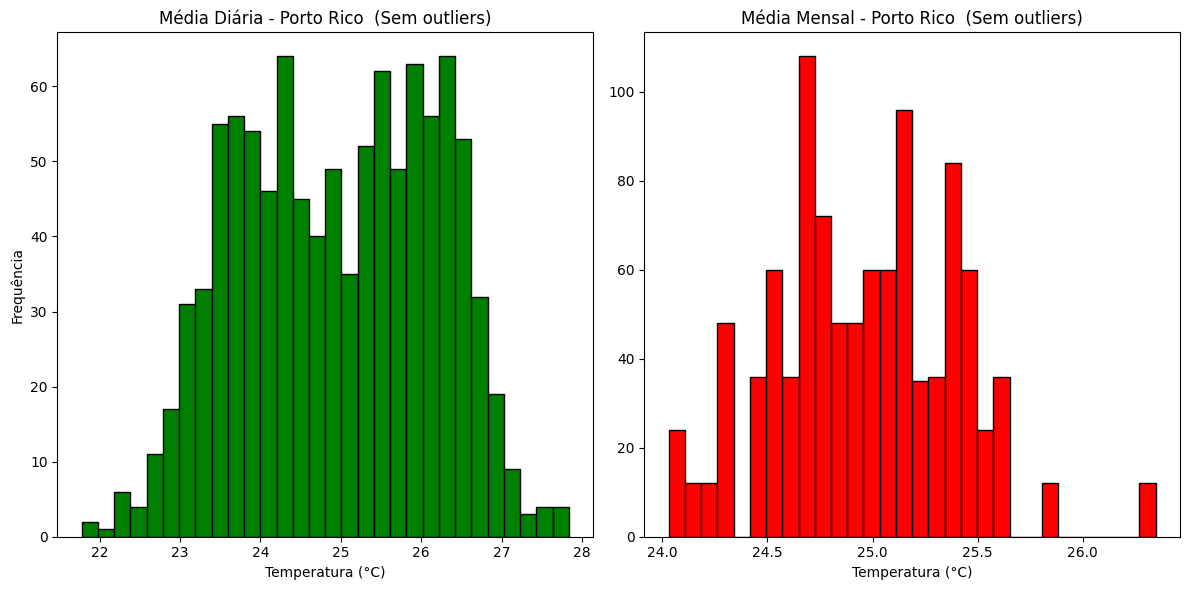

In [22]:
df_sem_outliers = df_filtrado[~df_filtrado['Average surface temperature daily'].isin(outliers_diario_superior)]
df_sem_outliers = df_sem_outliers[~df_sem_outliers['Average surface temperature monthly'].isin(outliers_mensal_superior)]

gerar_histogramas("Porto Rico  (Sem outliers)", df_sem_outliers)

In [23]:
# Importar metódo de análise de periodo
from Funcoes import analisar_periodo

mes_inicial, mes_final = analisar_periodo(df_sem_outliers, 'Day')


Período de análise:
Primeiro mês: 1940-01
Último mês: 2024-12


In [24]:
# Importar função para identificação de meses faltantes
from Funcoes import identificar_meses_faltantes

identificar_meses_faltantes(df_sem_outliers, 'Day')


Meses faltantes: 1
- 2002-12


PeriodIndex(['2002-12'], dtype='period[M]')

In [25]:
# Importar função de interpolarção de dados
from Funcoes import interpolar_dados 

df_sem_outliers = interpolar_dados(df_sem_outliers) 

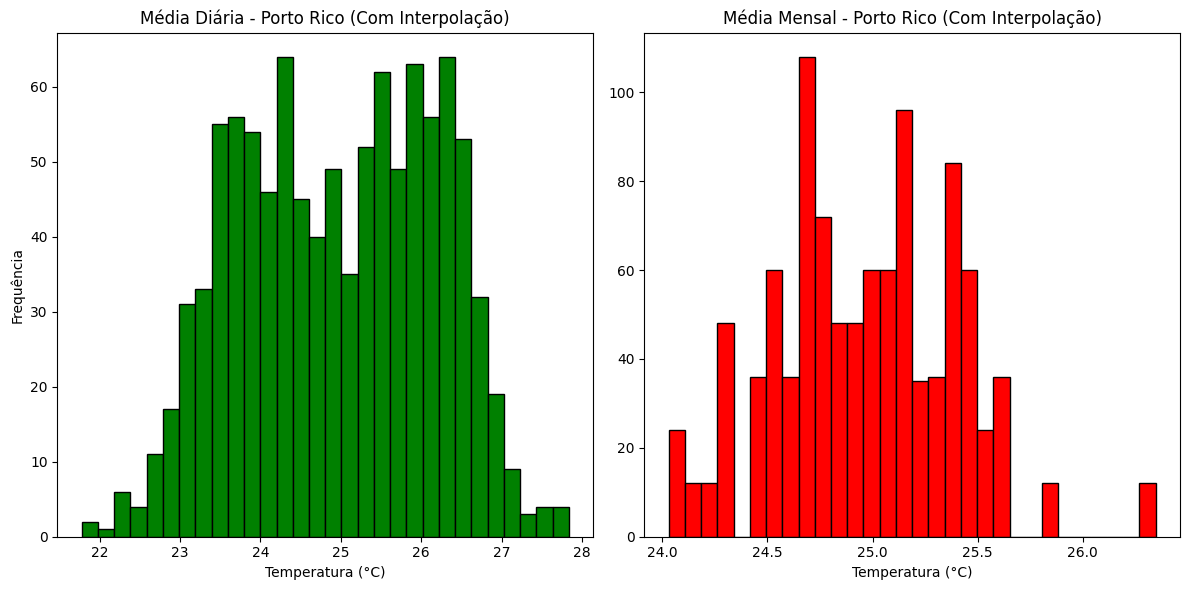

In [26]:
gerar_histogramas('Porto Rico (Com Interpolação)', df_sem_outliers)